# Pymaceuticals Inc.
---

### Analysis

- There is a strong positive correlation between mouse weight and average tumor volume for Capomulin test subjects.  The Capomulin test subject l509 saw tumor growth until timepoint 20, during which a massive decline in tumor volume was shown, with an overall trend of decreasing volume over the remaining timepoints.  Capomulin and Ramicane test subjects were observed to have significantly less tumor volume than Infubinol and Ceftamin test subjects.  This could be accounted for by the fact that Capomulin and Ramicane test subjects received the most drug administrations during the tests.  The study used an almost even number of male and female mice, so gender plays no part in differentiating results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_df[merged_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merged_df[merged_df["Mouse ID"]=="g989"]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdev=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary=pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance,
                      "Tumor Volume Std. Dev.":stdev, "Tumor Volume Std. Err.":sems})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
new_summ=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
new_summ


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

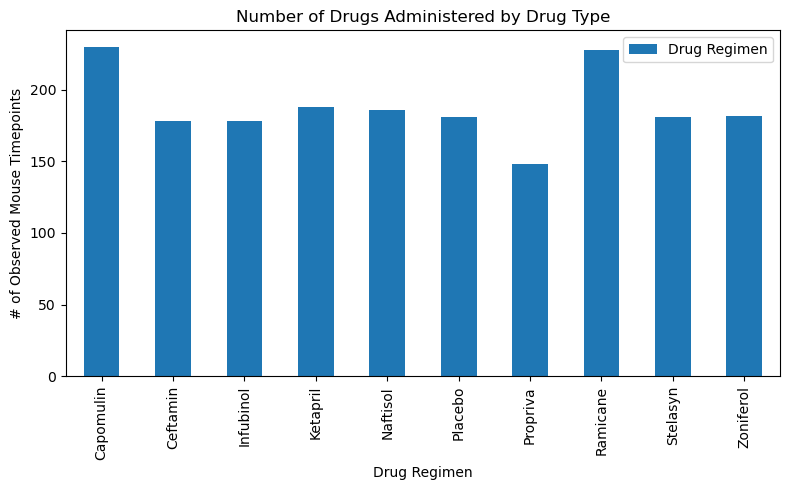

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs=clean_df.groupby("Drug Regimen")
drug_count=pd.DataFrame(drugs["Drug Regimen"].count())
drugs_bar=drug_count.plot(kind="bar", figsize=(8,5))
plt.title("Number of Drugs Administered by Drug Type")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

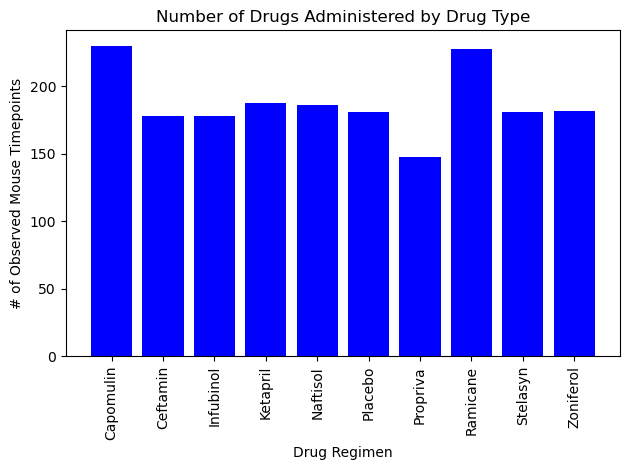

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis=np.arange(len(drug_count))
ticks=[x for x in x_axis]
plt.bar(x_axis, drug_count["Drug Regimen"], color="blue", align="center")
plt.xticks(ticks, list(drug_count.index), rotation="vertical")
plt.title("Number of Drugs Administered by Drug Type")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.tight_layout()
plt.show()

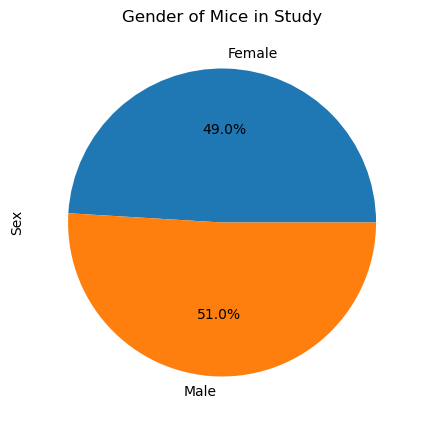

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genders=clean_df.groupby("Sex")
gender_df=pd.DataFrame(genders["Sex"].count())
gender_pie=gender_df.plot(kind="pie", figsize=(5,5), y="Sex", autopct="%1.1f%%", title="Gender of Mice in Study", legend=False)
plt.show()

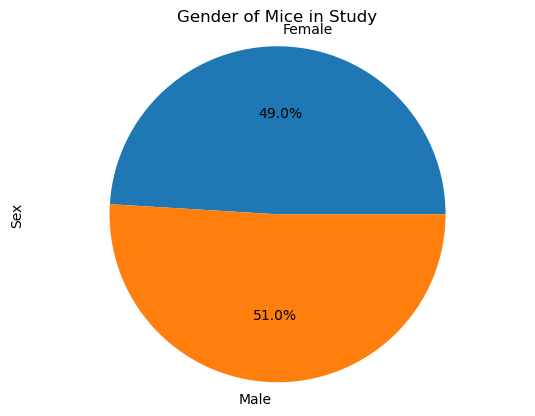

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_types=list(gender_df.index.values)
gender_count=gender_df["Sex"]
plt.pie(gender_count, labels=gender_types, autopct="%1.1f%%")
plt.title("Gender of Mice in Study")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoints=clean_df.sort_values("Timepoint",ascending=False)
timepoints=timepoints.drop_duplicates(subset=["Mouse ID"], keep="first")
timepoints=timepoints.drop(columns=["Metastatic Sites", "Timepoint", "Sex", "Age_months", "Weight (g)"])
timepoints
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Tumor Volume (mm3),Drug Regimen
1892,b879,72.555239,Stelasyn
1795,s508,30.276232,Ramicane
1797,y793,31.896238,Capomulin
1798,c766,69.823146,Placebo
1799,z578,30.638696,Ramicane
...,...,...,...
194,b447,45.000000,Ceftamin
222,t573,45.000000,Ceftamin
155,l872,45.000000,Placebo
135,d133,45.000000,Zoniferol


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    final_df=timepoints.loc[timepoints["Drug Regimen"]==drugs, :]
    quartiles = final_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=final_df.loc[(final_df["Tumor Volume (mm3)"]<lower_bound) | (final_df["Tumor Volume (mm3)"]>upper_bound)]
    print(f"{drugs}'s potential outliers: {outlier}")
    final_df=final_df.loc[:, "Tumor Volume (mm3)"]
    tumor_vol.append(final_df)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
# sorting=timepoints["Drug Regimen"].isin(treatments)
# right_treatments=timepoints[sorting]
# tumor_vol=right_treatments["Tumor Volume (mm3)"]
# tumor_vol.head()

    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3), Drug Regimen]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3), Drug Regimen]
Index: []
Infubinol's potential outliers:     Mouse ID  Tumor Volume (mm3) Drug Regimen
420     c326           36.321346    Infubinol
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3), Drug Regimen]
Index: []


C:\Users\cja12\AppData\Local\Temp\ipykernel_56200\990790545.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatments)


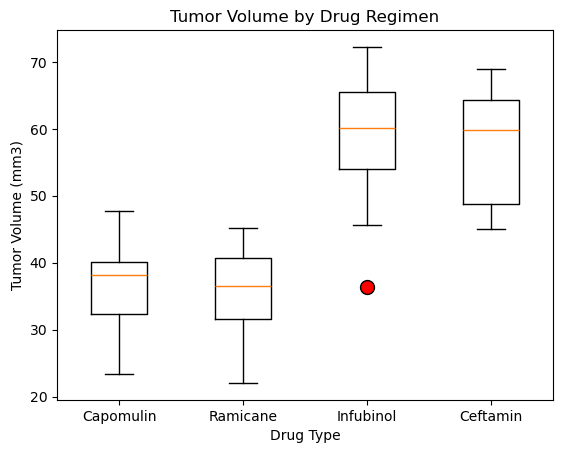

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Type')
ax1.set_xticklabels(treatments)

ax1.boxplot(tumor_vol, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()

## Line and Scatter Plots

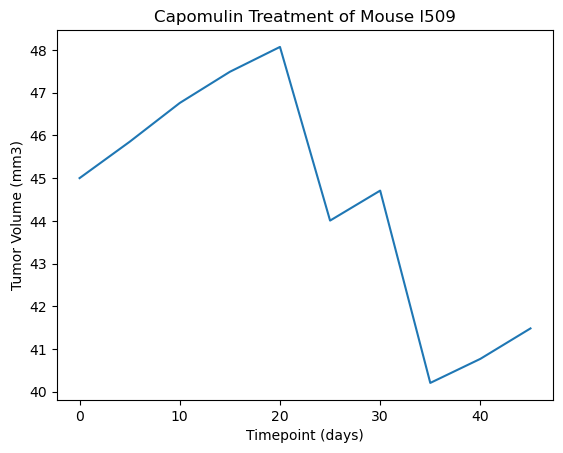

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_df=clean_df.set_index("Mouse ID")
capo_mouse=mouse_df.loc["l509",:]
fig2, ax2=plt.subplots()
ax2.set_title("Capomulin Treatment of Mouse l509")
ax2.set_xlabel("Timepoint (days)")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.plot(capo_mouse["Timepoint"], capo_mouse["Tumor Volume (mm3)"])
plt.show()


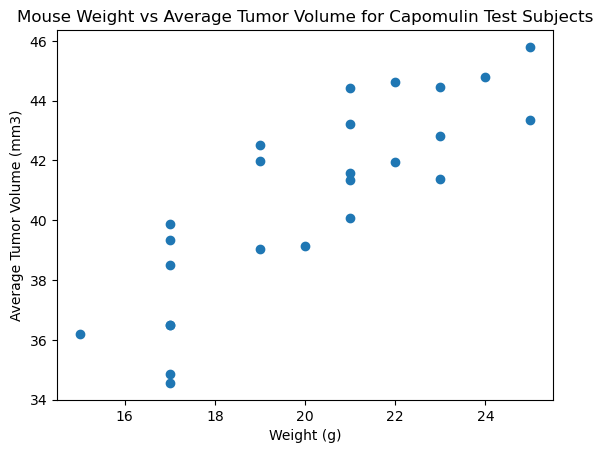

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Test Subjects")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.7088568047708723


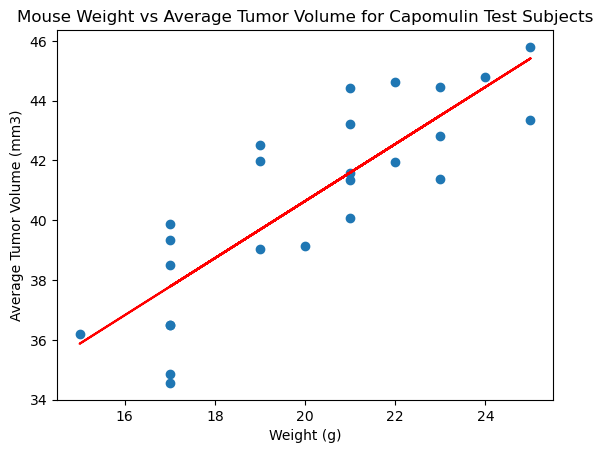

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])
regress_values = weight_df["Weight (g)"] * slope + intercept
plt.scatter(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])
plt.plot(weight_df["Weight (g)"], regress_values, "r-")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Test Subjects")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()